## _How and why to put your Jupyter Notebooks into Docker containers_

## To follow along with the slides locally:

#### 0. `docker pull brianaustin/jdslides` (optional)

#### 1. `docker run -p 8899:8888 brianaustin/jdslides`

#### 2. open `localhost:8899` and enter password `pydata`

#### 3. click `JupyDockerSlides.ipynb` and click the little <button class="btn btn-default" title="Enter/Exit RISE Slideshow" id="RISE" data-jupyter-action="RISE:slideshow" data-ol-has-click-handler=""><i class="fa-bar-chart fa"></i></button> icon on top



## OR

### Github: `github.com/austinbrian/jupydocker`

* This is listed as a novice talk, but really it assumes some exposure to Jupyter, and a conceptual understanding of Docker.

* This talk was built with and runs on a Docker container. The instructions on this first page are the instructions that are necessary to share the image that we will build up.

# _How and why to put your Jupyter Notebooks into Docker containers_
---

### Brian Austin   
Data Scientist   
<img style="float: middle;padding:10px;width:150px" src="https://mma.prnewswire.com/media/819833/U_Group_Logo.jpg">




## Agenda
1. Three primary uses of Jupyter notebooks
2. Drawbacks of Jupyter 
3. Walkthrough of using Dockerfile to embed Jupyter notebook in a Docker container
4. Sharing a Docker container with an audience via Docker Hub

## Analysis is only as good as your ability to communicate it

## Motivating Problem for this Talk

A client requested a **runnable notebook** with the code required to **view and run all AI/ML models** used for the analysis.

* Government client
* Basic technical skills, but confidence in some of the finer points was not high
* Nbviewer export was not a sufficient solution
* Submission, so no opportunity for follow-up instructions or troubleshooting
* Instructions were to avoid vendor lock-in, so wanted something other than AWS SageMaker

#### Anybody had a similar experience?

If you weren't sure they could do it, why did you send them a Jupyter notebook? What were you using it for?

## How we were using Jupyter notebooks

### Persistent read-evaluate-print loop
- Designing, developing and testing solutions to problems using Jupyter as a persistent IDE
- Testing individual functions and components for speed 
- Fast iteration with in-memory data objects (e.g., pandas DataFrames, Neo4j subgraph objects)

In [1]:
# how do I zip up json objects again?

d_a = [{'some':24,'stuff':14},{'other':68, 'things':84}]
d_b = [{'entirely':18,'added':77},{'more':66,'keys':27}]
all_dicts = list(map(lambda a,b: dict(a, **b), d_a, d_b))
all_dicts

[{'some': 24, 'stuff': 14, 'entirely': 18, 'added': 77},
 {'other': 68, 'things': 84, 'more': 66, 'keys': 27}]

### Analysis presentation
- Presenting analyses I've completed, demonstrating _both_ the code and output for them in tidy concise cells like **this** one you're reading right here currently on this slide right now.
- Vizualization iteration
- Code evaluation / sharing

- This whole slideshow is built in a jupyter notebook (running on a docker container)
- This the key use case for the scenario we talked about, with the other two as supporting
- Don't do code review using notebooks, but use them to share and talk about methods -- good for pairing


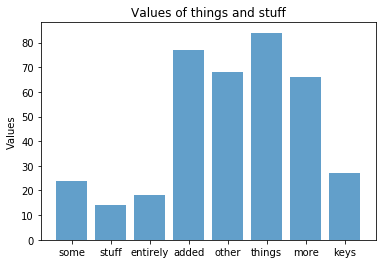

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
objects = list(x for sublist in all_dicts for x in sublist.keys())
y_pos = range(len(objects))
vals = [x for sublist in all_dicts for x in sublist.values()]

plt.bar(y_pos, vals, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Values')
plt.title('Values of things and stuff')
plt.show()

### Library/module walkthroughs
- Hands-on walkthroughs of new library modules
- New visualization techniques and demonstrations
- Establish new strategies for attacking existing problems using familiar libraries

Great example of new strategies is Enigma Technologies' [blog post on using TF-IDF to classify tabular data](https://www.enigma.com/blog/tf-idf-for-tabular-data-featurization-and-classification) -- I'd love to see that as a Jupyter notebook (or Docker container!)

In [3]:
!ls -al

total 60
drwxr-xr-x 8 root root   256 Nov  1 19:00 .
drwxr-xr-x 1 root root  4096 Nov  1 18:47 ..
drwxr-xr-x 3 root root    96 Nov  1 14:40 .ipynb_checkpoints
-rw-r--r-- 1 root root   545 Nov  1 17:10 Dockerfile
-rw-r--r-- 1 root root 45308 Nov  1 19:00 JupyDockerSlides.ipynb
-rw-r--r-- 1 root root    30 Oct 31 13:42 requirements.txt
drwxr-xr-x 4 root root   128 Nov  1 19:00 src
drwxr-xr-x 3 root root    96 Nov  1 18:44 static


**Notice the `src` directory -- let's take a look at what's in there**

In [4]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

Thanks, StackOverflow! https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python

You can also load these images with state; so I didn't need to run this slide to call the function below, because it's already loaded in.

In [9]:
list_files('.')

./
    requirements.txt
    Dockerfile
    JupyDockerSlides.ipynb
    static/
        jupyter_login_page.png
    .ipynb_checkpoints/
        JupyDockerSlides-checkpoint.ipynb
    src/
        __init__.py
        new_module.py


In [ ]:
# %load src/new_module.py
def reverse(s:str):
    '''Returns a reversed string'''
    return s[::-1]


In [11]:
%load_ext autoreload
%autoreload 2

from src import new_module

In [ ]:
%%bash 
rm -rf src/__pycache__/

In [12]:
# this function is imported from the local src library 
new_module.reverse('reverse me') 

'em esrever'

In [ ]:
# let's make it a double reverse
# %%writefile src/new_module.py

## Major Drawbacks
   
_Why don't people collaborate on one another's Jupyter notebooks more often?_

### Organization is tough

#### _Trying to organize things feels like more trouble than it's worth_


The ad hoc nature of notebooks is excellent for trying things out but tends to run into problems when you need to reproduce your work for someone else. There are cells all over the place, they’ve been run in a random order as you tried to get something working. 



<img style="float: right;padding:20px;width:400px" src="https://media.giphy.com/media/47JYommcSWTeiHmG0B/giphy.gif">

#### _TFW somebody didn't clean up their notebooks and now there is a maze of errors_

### Time pressure limits reproducibility
#### _Either include your expensive cleaning/training steps or have reproducible workflow_
When you use Jupyter notebooks to develop workflows, you might spend a bunch of time doing expensive setup, cleaning, or training operations that you don’t necessarily need for a new audience to repeat. It might be easier if they could just start with the cleaned data, the trained model, and get right to the analysis.

### Setting up an environment creates a lot of room for error
Even if you do want someone to repeat all your steps, ensuring they have their system set up in the same way you did when you made the initial analysis requires you to both do everything on your end correctly and also ensure that anyone you want to use your analysis can easily set up and get stated.    

 This step can be non-trivial. It might require you to save a requirements.txt file using the correct specific versions of your packages, make your module installable using a setup.py file, run a specific version of python, and ensure you don’t have any conflicting dependencies with any of your other libraries (or set up a virtual environment for just this analysis, install the requirements, and load the virtualenv as a conda environment that your Jupyter notebook can access, and be sure to activate it as the kernel used when you review the analysis).

So that means after you're done with your analysis you need to:

1. Save a `requirements.txt` file using the correct specific versions of your packages.

2. Make sure your code is usable for the versions of python your audience will need. Or include instructions on installation.

3. Make sure that any conflicting versions of packaging dependencies are worked out in the requirements file, not just for the packages you use, but for conflicts that might exist for any user. _Yikes._

#### _OR you could..._
4. Assume the audience will be able to set up a virtual environment for this analysis.

5. And that they will install the requirements into that virtual environment.

6. And that they will load the virtual environment as a conda environment that the Jupyter notebook can access, and activate that kernel when they start up the notebook

> *Sidenote: This is actually a really common pattern for me and a thing that I repeatedly have to Google.* **(python 3.6+)**    
>`python -m venv ~/place/for/envs/<ENV_NAME>`    
>`source ~/place/for/envs/<ENV_NAME>/bin/activate`   
>`pip install ipykernel jupyter`   
>`ipython kernel install --name=<ENV_NAME>`   


### Version control is a nightmare
Raw `.ipynb` files contain tons of nested JSON, which updates each time a cell has been run -- which data scientists do frequently and meaninglessly. Re-running graphs or other large python objects also updates the giant binary blob that feeds the notebook backend. 

![](https://blogamirathi.files.wordpress.com/2018/07/screen-shot-2018-07-23-at-4-51-38-pm1.png?w=700)

**Trying to diff changes in notebooks is hard; trying to merge them is _very_ hard**

## Containerization
Docker containers can take some of these headaches away, or at least put them onto the developer/data scientist who built it
![](http://community.datacamp.com.s3.amazonaws.com/community/production/ckeditor_assets/pictures/204/content_docker.png)

### We'll walk through the steps to creating a Docker image from a Dockerfile
(And this is one right now!)

## What Docker is and how it works

## Where you're starting
Assume you have a completed Jupyter notebook. The object is to have a running, reproducible notebook.

We need to generate a process that will:
1. Build a base image
2. Set up the source code Docker will run
3. Prep your data, run the required code, and start the notebook

These steps create the Dockerfile -- the list of instructions. The next steps run and share it.

4. Build the Docker container
5. Run the container
6. Share the container

### Step 1. Build a base image
Create a Dockerfile (just name the file "Dockerfile") and start with the following lines:

```
FROM python:3.6-slim
RUN pip install jupyter numpy matplotlib
```


Or if you have a `requirements.txt` file you'd rather use:

```
FROM python:3.6-slim
RUN pip install -r requirements.txt```



* A base image is another Docker image that has all your baseline needs.
    * Can be anything from an empty linux environment to a hardened python environment with important libraries already installed.
* This is also where you would install the tricky C libraries like `gcc` that can cause you to run into tons of issues later.
* In that case you might want to start with a full operating system, rather than just a python base.


```
FROM jessie-slim:latest
RUN apt-get update && apt-get -y update
RUN apt-get install -y build-essential python3.6 python3-pip python3-dev
# RUN apt-get install -y gcc clang
RUN pip3 -q install pip –upgrade
```

### Step 2. Set up the source code Docker will run

Let's take a look at the `src/` library we started working with earlier.

In [13]:
list_files('.')

./
    requirements.txt
    Dockerfile
    JupyDockerSlides.ipynb
    static/
        jupyter_login_page.png
    .ipynb_checkpoints/
        JupyDockerSlides-checkpoint.ipynb
    src/
        __init__.py
        new_module.py
        __pycache__/
            new_module.cpython-36.pyc
            __init__.cpython-36.pyc


Copy everything into a source directory on the container side.
```
RUN mkdir src
WORKDIR src/
COPY . .
```

### Step 3. Prep your data and run your code


Run the process that will clean your data and train a model. This will save the trained model into your container as the result of your module.py process. It can then be used by the notebook code in the notebooks folder.

```
RUN python3 module.py
```

Since the module.py process is going to save a cleaned, deduplicated, processed dataset, go ahead and remove the raw data from the Docker image. This will make the image smaller (and thus easier to download) but is entirely optional. If you anticipate that there will be changes to the process of cleaning and preparing the data you can leave it, but in general if you don’t need it, cut it out.

```
RUN rm /src/data/raw_data.csv
```

```
WORKDIR /src/notebooks
```

This ensures that whenever someone starts the Docker container, they will start at the notebook you have saved, which is good!

#### Final prep courtesy the [Jupyter Stacks project](https://github.com/jupyter/docker-stacks)

Add Tini. Tini operates as a process subreaper for jupyter. This prevents kernel crashes.
```
ENV TINI_VERSION v0.6.0
ADD https://github.com/krallin/tini/releases/download/${TINI_VERSION}/tini /usr/bin/tini
RUN chmod +x /usr/bin/tini
ENTRYPOINT ["/usr/bin/tini", "--"]
```

* This code comes from the Jupyter Docker Stacks project, an open-source repository that builds ready-to-use data science notebooks to start development and visualization projects. 
    * These are great for development but loading new data into them can be a little tricky. 
* This process demonstrates that you can take a snippet from other Dockerfiles and include it in your own.

From there just start up the notebook at the end of the Dockerfile. Most of this is probably familiar if you have used Jupyter notebooks before.

But take special note of the `port=8888` argument: we'll come back to it in Step 5.

```
CMD ["jupyter", "notebook", "--port=8888", "--no-browser", "--ip=0.0.0.0", "--allow-root", "NotebookApp.token='pydata'"]
```

Most of these arguments are effectively using default Jupyter arguments that aren't really relevant to local development, but can be important when you are connecting a server to your local machine.

The `NotebookApp.token` argument can be anything, even a blank string, which skips auth. 

Don't skip auth, especially if you are running a docker notebook not on your local machine but on a public server.

### Complete Dockerfile
```
FROM python:3.6-slim
RUN pip install jupyter numpy matplotlib

RUN mkdir src
RUN mkdir 
WORKDIR src/
COPY . .

RUN python3 module.py
RUN rm data/raw_data.csv
WORKDIR notebooks/


ENV TINI_VERSION v0.6.0
ADD https://github.com/krallin/tini/releases/download/${TINI_VERSION}/tini /usr/bin/tini
RUN chmod +x /usr/bin/tini
ENTRYPOINT ["/usr/bin/tini", "--"]

CMD ["jupyter", "notebook", "--port=8888", "--no-browser", "--ip=0.0.0.0", "--allow-root", "NotebookApp.token='pydata'"]
etc
```

### Step 4. Build a Docker container
This step creates the virtual machine that holds your notebook, code, and data.

```sh
docker build -t myaccount/new_project .
```

(Make sure you remember the dot here!)  ------------ ☝️

The `-t` argument allows you to to name the container. A good practice could be to name it for the project whose analysis you want to use, but it could be anything. 

### Step 5. Start the Jupyter notebook and log in

The irreducable command for another person to run it (what you ran at the beginning!):
```
docker run -p 8889:8888 myaccount/new_project
```
* You really just need to make sure to link the container's port (that Jupyter is running on) with your local computer's relevant port, and a way to point at the project you want them to open. 
* Remember that we set the token/password in the Dockerfile
* If you don't set it there will be an automatically-generated token generated by jupyter in the terminal



![](static/jupyter_login_page.png)


### Step 5a. Some nice features to use instead

But some additional Docker features can be turned on for a little convenience:
```
docker run                      #  start up a container already built or pulled
    -p 8889:8888                #  port used, <local port>:<container port>
    -it                         #  run Docker interactively
    --rm                        #  remove the container when it exits
    -v `pwd`:/src/notebooks     #  use local files <local path>:<container path>
    myaccount/new_project:1.0   #  use specified user/project:version container
```

These are detailed in the appendix for those who want a more specific walkthrough.

### Step 6. Push to Docker Hub repository for sharing


* If you don't want to use DockerHub, AWS elastic container registry (ECR) is essentially a private Docker Hub

```
docker push myaccount/new_project
```
* Ensure you are logged in to Docker Hub
* Creates the tag `latest` if no version or other tag is specified.

## Questions?


Talk by Brian Austin - [austinbrian.github.io](https://austinbrian.github.io/about/)

---

## References and Resources

- [RISE](https://github.com/damianavila/RISE) is a Jupyter extension that allows running of notebooks iteratively as slides
- Matt Speck's [guide to launching slides](https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67) using a Jupyter notebook
- Amit Rathi's [blog post on jupyter diffs](https://blog.amirathi.com/2018/07/23/github-with-jupyter-notebook/)
- Jupyter notebook [security blog post](https://blog.jupyter.org/public-notebooks-and-security-3058c433c884)
- The [Jupyter Stacks project](https://github.com/jupyter/docker-stacks), Docker images intended as ready-to-run starting points

## "Why don't you just..."
There are good alternative solutions to almost everything I've presented here. This is one way to do it. Do it other ways if you like those better! Here are a couple of suggestions
- Simplify your notebook's json output for version control diffs with [nbconvert](https://nextjournal.com/schmudde/how-to-version-control-jupyter) or [nbdime](https://github.com/jupyter/nbdime)
- [Repo2Docker](https://hub.docker.com/r/jupyter/repo2docker), a Jupyter-built Docker image specifically for turning a git repository into a Jupyter-enabled 

---

## Appendix

### Step 5a. Optional run features

But some additional Docker features can be turned on for a little convenience:
```
docker run                      #  start up a container already built or pulled
    -p 8889:8888                #  port used, <local port>:<container port>
    -it                         #  run Docker interactively
    --rm                        #  remove the container when it exits
    -v `pwd`:/src/notebooks     #  use local files <local path>:<container path>
    myaccount/new_project:1.0   #  use specified user/project:version container
```

#### Let's step through those lines
```
docker run                      #  start up a container already built or pulled
    -p 8889:8888                #  port used, <local port>:<container port>
    -it                         #  run Docker interactively
```
* The `run` step starts up the container and `-p` points at the port necessary to run it. 
* The `-it` argument allows you to make changes to it after you open it, like installing a new library from the command line. 

This is mostly the kind of behavior we want to avoid for analysis purposes, but it can become useful in some circumstances.

    --rm                        #  remove the container when it exits

* `--rm` Keeps you from cluttering up your local system with a lot of containers, which can be memory-intensive.
* Note that it takes two dashes, rather than one


    -v `pwd`:/src/notebooks     #  use local files <local path>:<container path>
* The `-v` argument will mount a volume, here using the present working directory locally, and connecting to the `/notebooks` path on the container. 
* Remember that we put our Jupyter notebooks into the `/src/notebooks` folder in the Dockerfile, and that it should look like the current directory
* Allows you to make changes to a local file while using a container to run that file

    myaccount/new_project:1.0   #  use specified user/project:version container    
* The account, project name, and version you're pulling (or `latest`) goes at the end of the run command.

### Other Dockerfiles
```
FROM jessie-slim:latest
RUN apt-get update && apt-get -y update
RUN apt-get install -y build-essential python3.6 python3-pip python3-dev
# RUN apt-get install -y gcc clang
RUN pip3 -q install pip –upgrade
```